# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

In [74]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score

#Auto reload is used to ensure changes made to utils show up immediatly
%load_ext autoreload
%autoreload 2

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Data Task

From a data perspective, our objective is to analyze the provided used car dataset to identify the key features that significantly influence car prices. This involves formulating predictive models—specifically, using regression analysis( this a regression problem ) to model the relationship between car attributes (such as make, model, year, mileage, condition, and other relevant features) and their market prices. By applying statistical techniques and supervised machine learning algorithms, we aim to quantify the impact of each variable on the car's price, thus determining the primary factors that drive used car pricing.

#### Objectives
1. Understand the relationship between various features and used car market prices.
2. Build and evaluate multiple regression models to predict used car market prices.
3. Provide actionable insights based on model findings.

### Data Dictionary

The dataset contains details about car listings across various regions, including attributes like price, condition, and specifications.

1. **id**: Unique identifier for each listing.

2. **region**: The region where the listing is located, generally represented as a city or metropolitan area.

3. **price**: The price of the car in USD.

4. **year**: The manufacturing year of the vehicle.

5. **manufacturer**: The manufacturer or brand of the vehicle (e.g., Ford, Toyota).

6. **model**: The specific model of the car (e.g., Camry, Civic).

7. **condition**: The condition of the car as specified by the seller (e.g., new, like new, excellent, good, fair, salvage).

8. **cylinders**: The number of cylinders in the engine (e.g., 4-cylinder, 6-cylinder).

9. **fuel**: The type of fuel the car uses (e.g., gasoline, diesel, electric, hybrid).

10. **odometer**: The mileage of the vehicle, recorded in miles.

11. **title_status**: The status of the vehicle's title (e.g., clean, salvage, rebuilt, lien).

12. **transmission**: The type of transmission the vehicle has (e.g., automatic, manual, other).

13. **VIN**: Vehicle Identification Number, a unique code used to identify individual motor vehicles.

14. **drive**: The type of drivetrain (e.g., front-wheel drive, rear-wheel drive, all-wheel drive).

15. **size**: The size category of the vehicle (e.g., compact, mid-size, full-size).

16. **type**: The body type of the car (e.g., sedan, SUV, truck, coupe).

17. **paint_color**: The color of the vehicle's exterior paint.

18. **state**: The state where the listing originates from, represented as a two-letter abbreviation (e.g., CA, NY).


In [76]:
# Load the dataset
vehicles_df = pd.read_csv('data/vehicles.csv')

In [79]:
vehicles_df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

To get familiar with the dataset and identify potential quality issues, I would take the following steps:
1. Import the CSV into a Dataframe
2. Review Data Strucutre to gain an inital understanding of columns of level of data integrity
3. Summar of statiscis of numerical features
4. If necessaryy Graph data to further understand relationships beteween features
5. Look for inconsistencies such as incorrect data types, unrealistic values (e.g., negative prices or mileage).
6. Identify any potential bias or imbalance in the data (e.g., more data for certain car brands or models than others).

In [75]:

# Examine the dataset
print("Dataset info:")
print(vehicles_df.info())  # Structure and data types

print("\nFirst few rows of the dataset:")
print(vehicles_df.head())  # Preview the first few rows

print("\nSummary of statics of features")
print(vehicles_df.describe())





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  obj

In [62]:
from utils import analyze_missing
analyze_missing(vehicles_df)



Percentage of Missing Values:
 id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


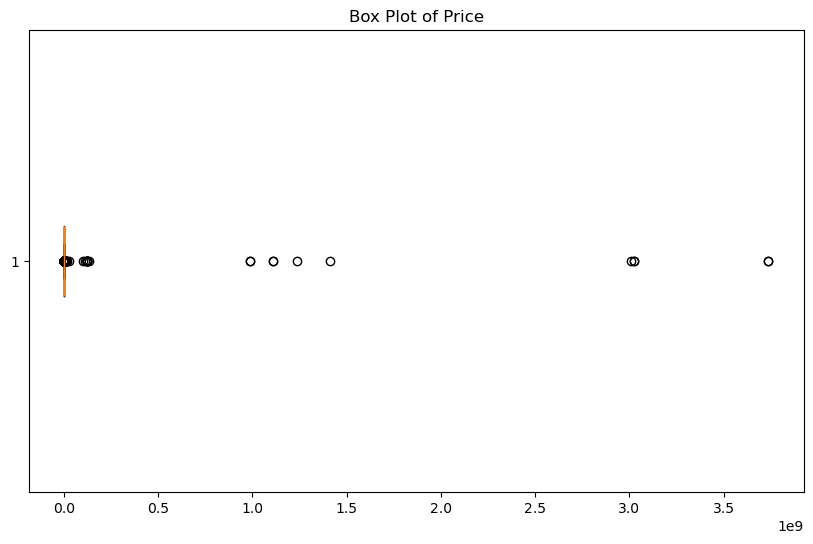

In [63]:
# Create a box plot for the price column
plt.figure(figsize=(10, 6))
plt.boxplot(vehicles_df[[ 'price']], vert=False)
plt.title('Box Plot of Price')
# plt.xlabel('Price')
plt.show()

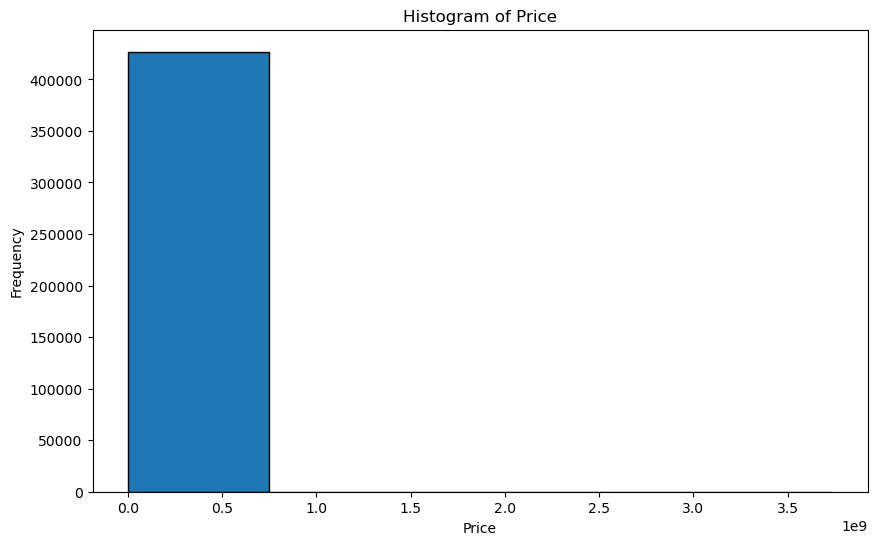

In [64]:
 # Create a histogram for the price column
plt.figure(figsize=(10, 6))
plt.hist(vehicles_df['price'].dropna(), bins=5, edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

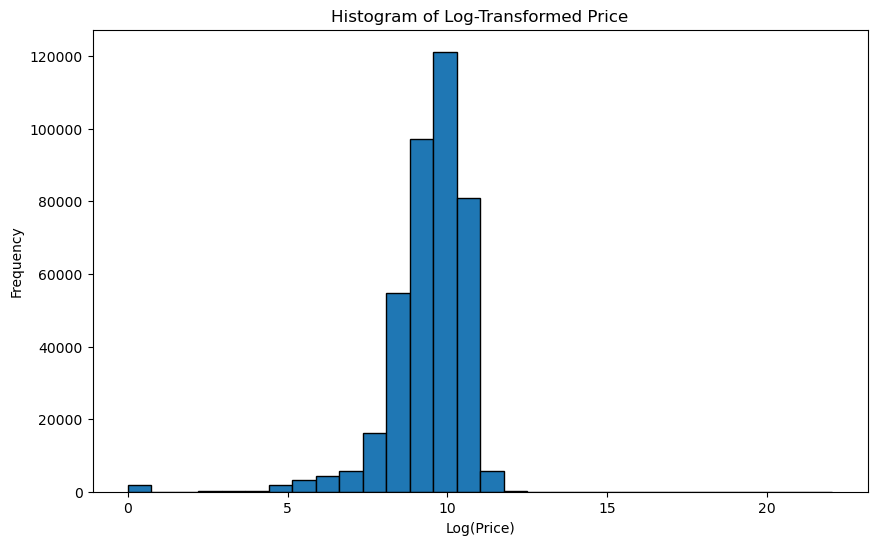

In [65]:
import numpy as np

# Apply log transformation to prices, filtering out non-positive values
log_prices = np.log(vehicles_df['price'][vehicles_df['price'] > 0].dropna())

# Create a histogram with log-transformed prices
plt.figure(figsize=(10, 6))
plt.hist(log_prices, bins=30, edgecolor='black')
plt.title('Histogram of Log-Transformed Price')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

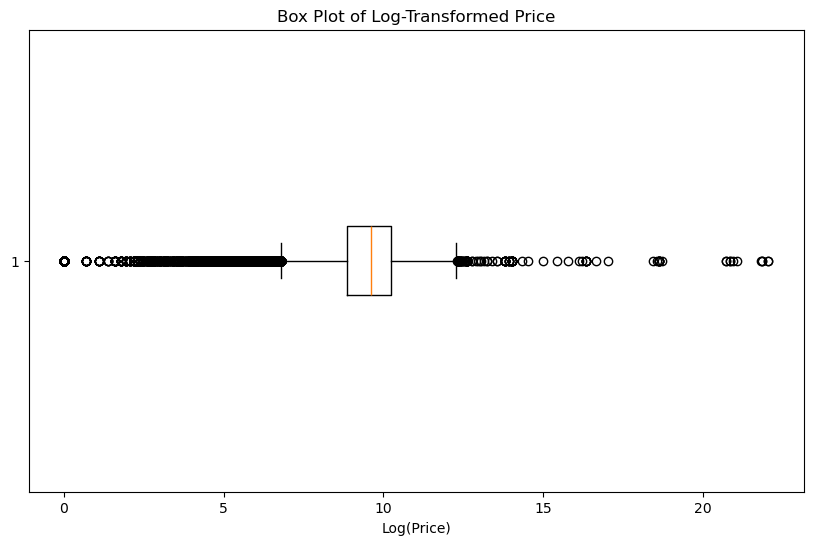

In [66]:

# Create a box plot with log-transformed prices
plt.figure(figsize=(10, 6))
plt.boxplot(log_prices, vert=False)
plt.title('Box Plot of Log-Transformed Price')
plt.xlabel('Log(Price)')
plt.show()

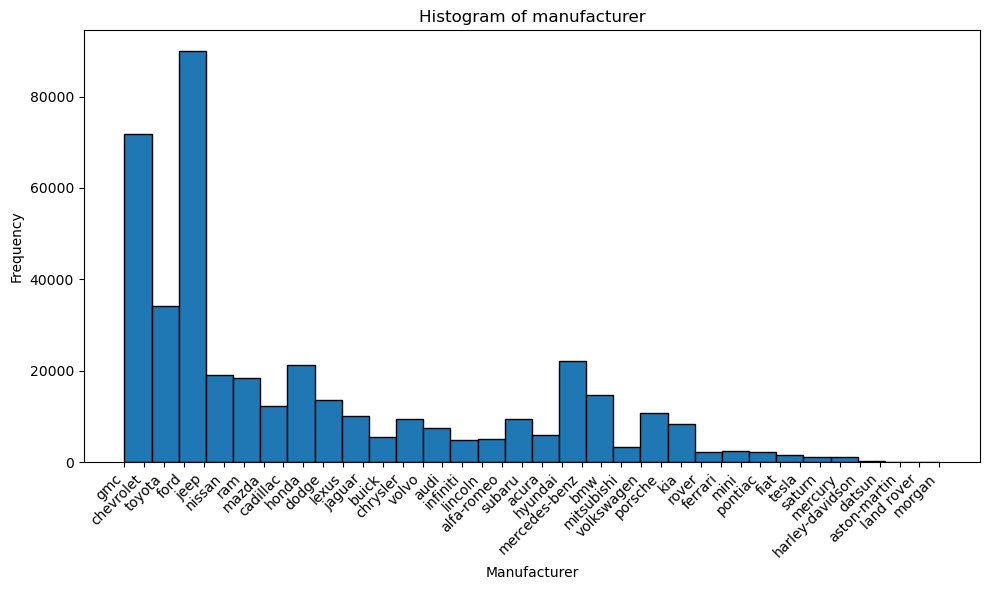

In [67]:
# Create a histogram with manufacturer
plt.figure(figsize=(10, 6))
plt.hist(vehicles_df['manufacturer'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

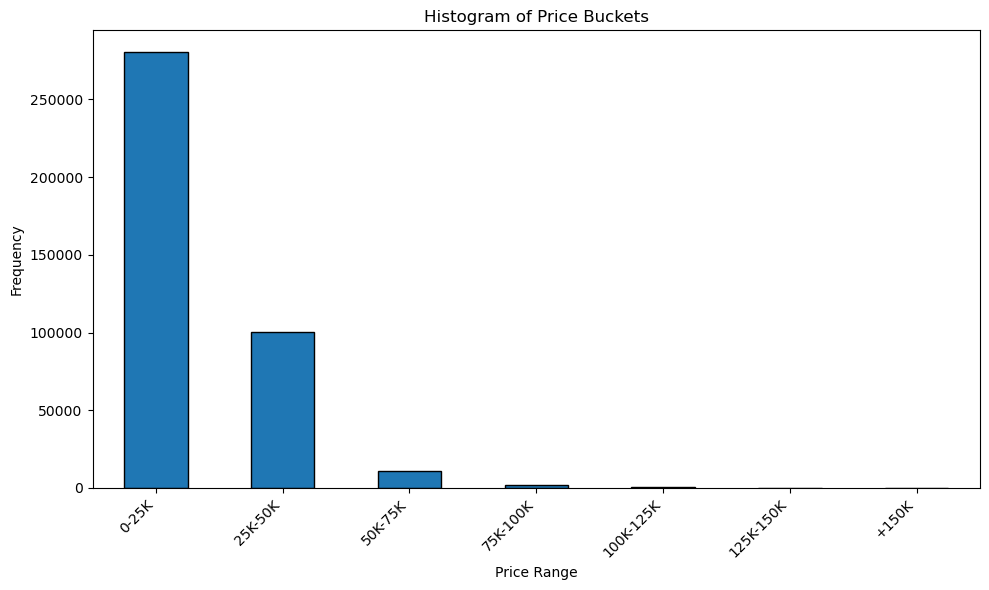

In [68]:
# Define custom price bins
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 1_000_000]
labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K', '100K-125K', '125K-150K', '+150K']

# Create a new column 'price_bucket' based on the defined bins
price_bucket= pd.cut(vehicles_df['price'], bins=bins, labels=labels)

# Create the histogram based on the 'price_bucket' column
plt.figure(figsize=(10, 6))
price_bucket.value_counts(sort=False).plot(kind='bar', edgecolor='black')
plt.title('Histogram of Price Buckets')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

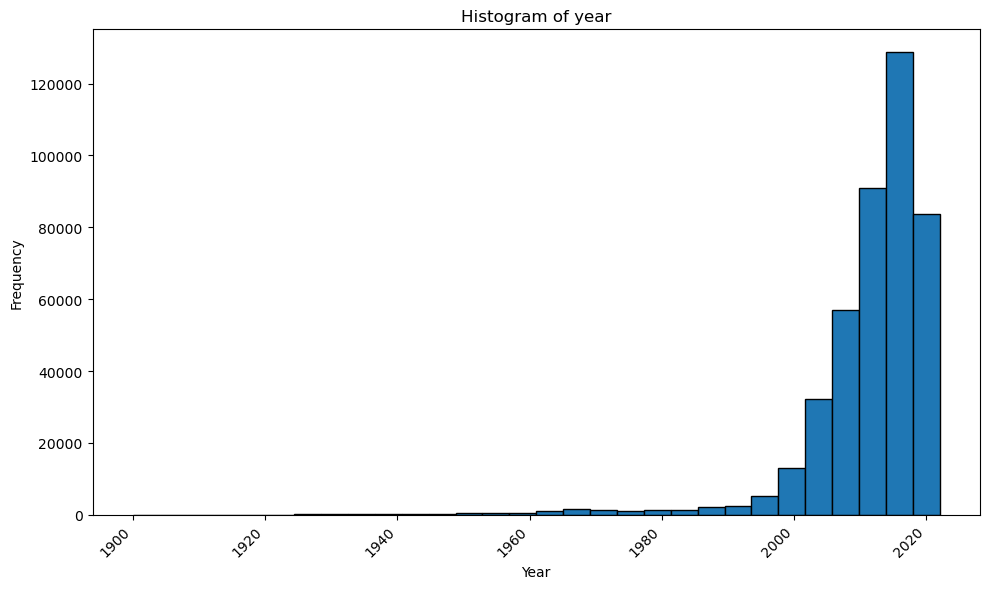

In [69]:
# Create a histogram with years
plt.figure(figsize=(10, 6))
plt.hist(vehicles_df['year'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [70]:
from utils import drop_columns, drop_nulls_from_columns

#Drop any colunns that will significantly increase dimenionality because they are random, unique or too many missing
vehicles_df_reduced_cols = drop_columns(vehicles_df, ['id', 'VIN', 'size', 'model'])


#drop rows that are null from columns that inuitively seem important
vehicles_df_reduced_cols_and_nulls = drop_nulls_from_columns( vehicles_df_reduced_cols, 
    [
        'year',
        'manufacturer',
        'title_status',
        'condition',
    ]
)
#remove rows with astronoimically high values/outliers
vehicles_df_reduced = vehicles_df_reduced_cols_and_nulls[vehicles_df_reduced_cols_and_nulls['price'] <= 99_999]

# convert year to age by subtracting the manufacturing year from the current year
vehicles_df_reduced['age'] = 2024 - vehicles_df_reduced['year']
vehicles_df_reduced = drop_columns(vehicles_df_reduced, ['year'])

#Review how many rows still missing
analyze_missing(vehicles_df_reduced)
vehicles_df_reduced.info()


/var/folders/wf/ftxcns9s2cdc0_lzmnf9bvqc0000gn/T/ipykernel_26782/643447724.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Percentage of Missing Values:
 region           0.000000
price            0.000000
manufacturer     0.000000
condition        0.000000
cylinders       28.666774
fuel             0.006772
odometer         0.793537
title_status     0.000000
transmission     0.013120
drive           23.180156
type            12.828630
paint_color     18.675408
state            0.000000
age              0.000000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 236284 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        236284 non-null  object 
 1   price         236284 non-null  int64  
 2   manufacturer  236284 non-null  object 
 3   condition     236284 non-null  object 
 4   cylinders     168549 non-null  object 
 5   fuel          236268 non-null  object 
 6   odometer      234409 non-null  float64
 7   title_status  236284 non-null  object 
 8   transmission  236253 non-null  object

In [71]:
#Reviewing the data at this point, 4 of the columns that may have an impact, still have a signficant number of nulls

from utils import  clean_and_encode, print_unique_values

print_unique_values(vehicles_df_reduced)


vehicles_df_cleaned_and_encoded = clean_and_encode(vehicles_df_reduced)

print("\nCleaned and Encoded info:")
print(vehicles_df_cleaned_and_encoded.info()) 

Column 'region' has 404 unique values.
Column 'price' has 7703 unique values.
Column 'manufacturer' has 42 unique values.
Column 'condition' has 6 unique values.
Column 'cylinders' has 8 unique values.
Column 'fuel' has 5 unique values.
Column 'odometer' has 61875 unique values.
Column 'title_status' has 6 unique values.
Column 'transmission' has 3 unique values.
Column 'drive' has 3 unique values.
Column 'type' has 13 unique values.
Column 'paint_color' has 12 unique values.
Column 'state' has 51 unique values.
Column 'age' has 106 unique values.

Cleaned and Encoded info:
<class 'pandas.core.frame.DataFrame'>
Index: 236284 entries, 27 to 426879
Columns: 551 entries, price to state_wy
dtypes: bool(548), float64(2), int64(1)
memory usage: 130.7 MB
None


Correlation of features with price:
price                    1.000000
transmission_other       0.471132
condition_good           0.235758
fuel_other               0.222984
type_pickup              0.220355
                           ...   
odometer                -0.202211
fuel_gas                -0.269872
drive_fwd               -0.274019
cylinders_4 cylinders   -0.302710
age                     -0.360738
Name: price, Length: 551, dtype: float64


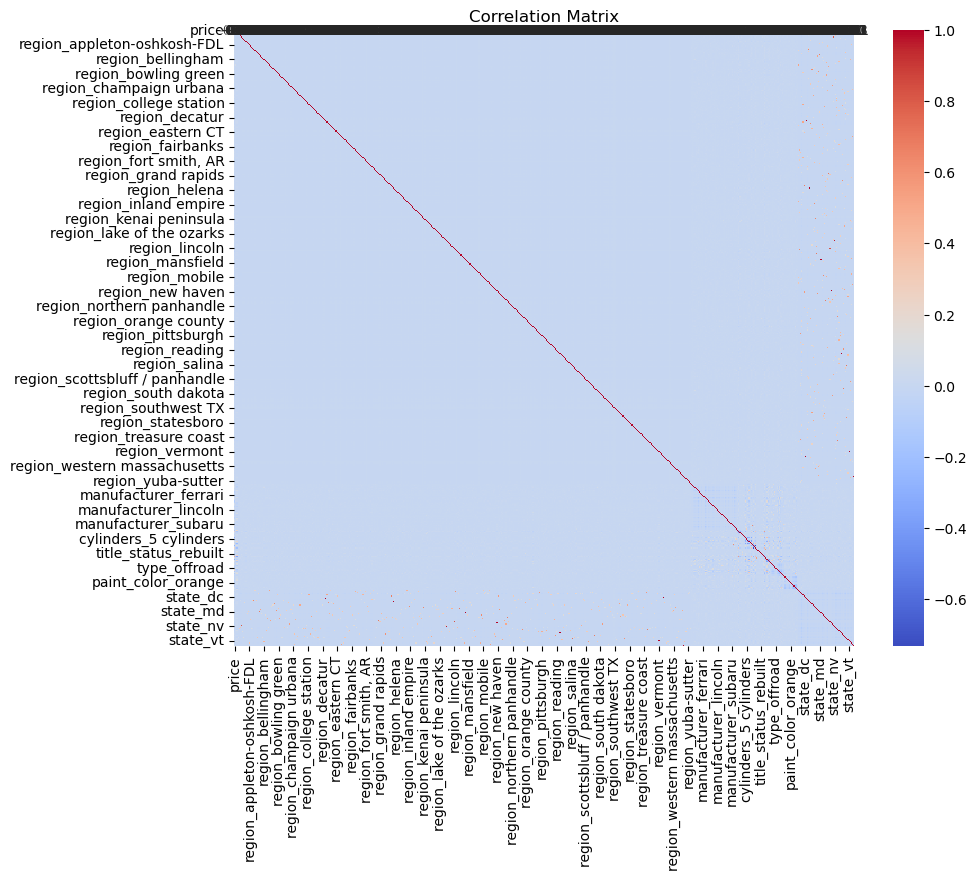


Highly correlated columns (above threshold):
Columns: ['region_delaware', 'state_de'], Correlation: 1.00, Variance Delta: 0.00
Columns: ['region_hawaii', 'state_hi'], Correlation: 1.00, Variance Delta: 0.00
Columns: ['region_las vegas', 'state_nv'], Correlation: 0.96, Variance Delta: -0.00
Columns: ['region_lincoln', 'state_ne'], Correlation: 0.83, Variance Delta: -0.00
Columns: ['region_maine', 'state_me'], Correlation: 1.00, Variance Delta: 0.00
Columns: ['region_new hampshire', 'state_nh'], Correlation: 1.00, Variance Delta: 0.00
Columns: ['region_rhode island', 'state_ri'], Correlation: 1.00, Variance Delta: 0.00
Columns: ['region_vermont', 'state_vt'], Correlation: 1.00, Variance Delta: 0.00
Columns: ['region_washington, DC', 'state_dc'], Correlation: 1.00, Variance Delta: 0.00
Columns: ['region_wyoming', 'state_wy'], Correlation: 1.00, Variance Delta: 0.00


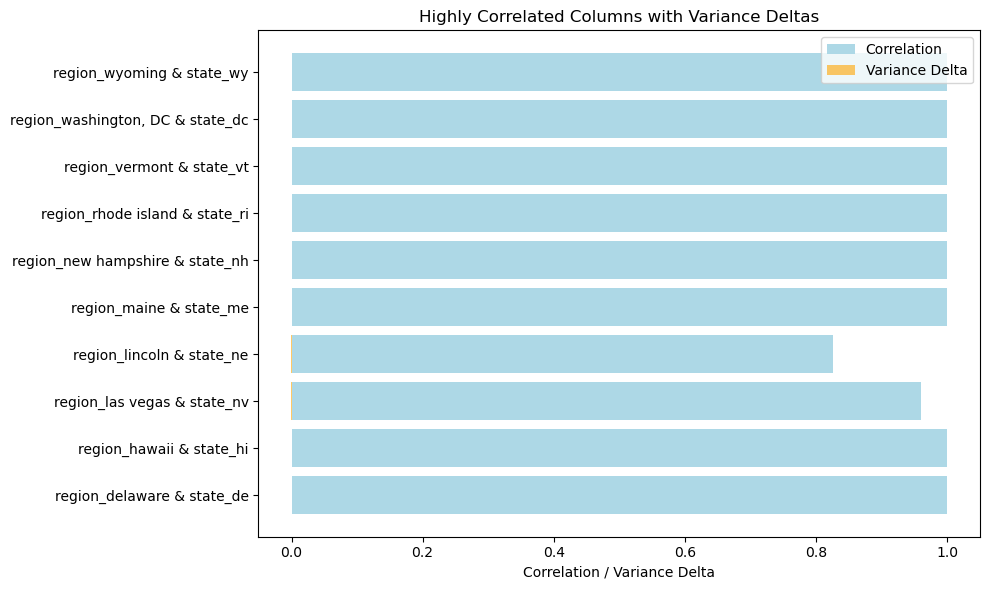

(price                    1.000000
 transmission_other       0.471132
 condition_good           0.235758
 fuel_other               0.222984
 type_pickup              0.220355
                            ...   
 odometer                -0.202211
 fuel_gas                -0.269872
 drive_fwd               -0.274019
 cylinders_4 cylinders   -0.302710
 age                     -0.360738
 Name: price, Length: 551, dtype: float64,
 [{'columns': ['region_delaware', 'state_de'],
   'correlation_value': 1.0,
   'variance_delta': 0.0},
  {'columns': ['region_hawaii', 'state_hi'],
   'correlation_value': 1.0,
   'variance_delta': 0.0},
  {'columns': ['region_las vegas', 'state_nv'],
   'correlation_value': 0.959417781139534,
   'variance_delta': -0.0005181002285884126},
  {'columns': ['region_lincoln', 'state_ne'],
   'correlation_value': 0.8252887292015987,
   'variance_delta': -0.0006032726478421748},
  {'columns': ['region_maine', 'state_me'],
   'correlation_value': 1.0,
   'variance_delta': 0

In [72]:
from utils import correlation_analysis

#analyze data for multicollinarity 
correlation_analysis(vehicles_df_cleaned_and_encoded, 'price', corr_threshold=0.8)







#### Check for Missing Values:
- Identify missing data using `.isnull().sum()` to see which columns have missing values and how prevalent those missing values are.
- Decide whether to impute, remove, or handle missing data based on the severity and business relevance of the columns.

#### Examine Data Distributions:
- Use histograms and box plots to understand the distribution of numerical features like price, mileage, and year.
- Look for outliers or skewed distributions that might need transformation (e.g., log transformation for highly skewed variables).

#### Explore Categorical Features:
- Review the unique values in categorical columns (e.g., car make, model, fuel type).
- Check if any categories have very few entries, which could indicate rare or unusual data points.

#### Check for Duplicates:
- Identify and handle duplicate entries using `.duplicated()` and consider removing them to avoid bias in analysis.

#### Examine Correlations:
- Generate a correlation matrix to identify relationships between numerical features and the target variable (price).
- Pay attention to multicollinearity between features, which might impact the modeling phase.

#### Initial Feature Engineering:
- Consider creating new features that could help with understanding (e.g., age of the car from year, price per mile driven).
- Investigate whether combining existing features could provide additional insights.

#### Assess Data Quality Issues:
- Look for inconsistencies such as incorrect data types, unrealistic values (e.g., negative prices or mileage).
- Identify any potential bias or imbalance in the data (e.g., more data for certain car brands or models than others).

#### Explore Relationships:
- Use scatter plots, pair plots, and heatmaps to visualize the relationships between different features and the target variable (price).
- Look for patterns that align with the business understanding (e.g., do newer cars tend to have higher prices?).

These steps will help in understanding the dataset’s content, quality, and relevance to the business objective, guiding further data cleaning and preparation for modeling.


In [39]:
df_filtered = vehicles_df[vehicles_df['price'] <= 99_999]
largest_prices = df_filtered['price'].nlargest(10)
largest_prices

44134     99999
44389     99999
77605     99999
80181     99999
246133    99999
255553    99999
277151    99999
363662    99995
369050    99995
378383    99995
Name: price, dtype: int64

In [43]:
vehicles_df.iloc[277151]

id                     7315009609
region              new york city
price                       99999
year                       2020.0
manufacturer                 ford
model                       f-150
condition                     NaN
cylinders                     NaN
fuel                          gas
odometer                   1404.0
title_status                clean
transmission            automatic
VIN             1FTEW1E52LFB87855
drive                         4wd
size                          NaN
type                       pickup
paint_color                 white
state                          ny
Name: 277151, dtype: object

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.